# Use CDF to Calculate Probabilities

Kris Barbier

## Imports and Load in Data 

In [1]:
#Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [2]:
#Load in data
df = pd.read_csv('Data/weight-height male-female - weight-height.csv')
males = df.loc[ df['Gender'] == 'Male'].copy()
females = df.loc[ df['Gender'] == 'Female'].copy()

## Initial Code for Visualization and Calculation Preparation

In [4]:
#Save variables
data = females['Height']
low_end = 55.0
high_end = 56.0
mean = np.mean(data)
std = np.std(data)
min = np.min(data)
max = np.max(data)


In [5]:
#Set the range and spacing for our normal curve
x_range = np.linspace(min, max,1000)

In [6]:
#Define CDF
cdf = stats.norm.cdf(x_range, loc=mean, scale=std)

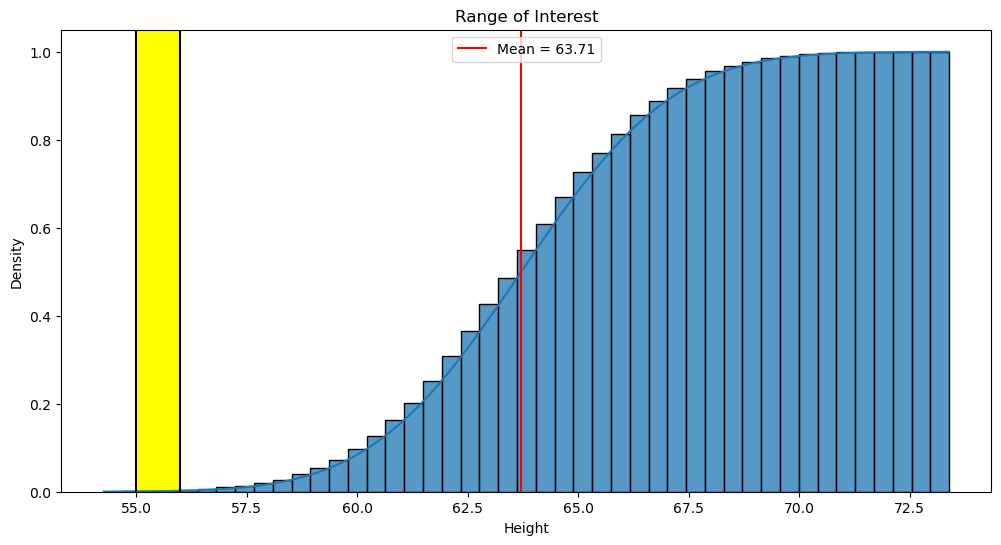

In [10]:
#Visualize CDF
fig, ax = plt.subplots(figsize=(12,6))
sns.histplot(x=data, stat='density', cumulative = True)
ax.plot(x_range,cdf)
ax.axvline(mean, color= 'red', label=f'Mean = {mean:,.2f}')
ax.axvline(low_end, color= 'black')
ax.axvline(high_end, color ='black')
ax.axvspan(low_end, high_end, color ='yellow', zorder = 0)
ax.set_title('Range of Interest')
ax.legend();

## Calculation 1:

- What is the probability that a female's height is between 55.0 and 56.0 inches?

    - There is a 0.15% chance that a female's height is between 55 and 56 inches.

In [8]:
##Perform calculation of probability
#Subtract high end and low end
stats.norm.cdf(high_end, loc = mean, scale = std) - stats.norm.cdf(low_end, loc = mean, scale = std)

0.0015043054289559897

## Calculation 2:

- What is the probability that a female's height is less than 5 ft (60 in.)?

    - There is an 8.5% chance that a female's height is less than 5 ft.

In [9]:
##Calculate probability of less than 5 ft.
stats.norm.cdf(60, loc = mean, scale = std)

0.08446492725207488

## Calculation 3:

- What is the probability that a female's height is greater than the mean (63.71)?

    - There is a 50% chance that a female's height is greater than the mean of 63.71 inches.

In [11]:
#Subtract calculation from 1 to get greater than mean
1 - stats.norm.cdf(63.71, loc = mean, scale = std)

0.49981852418110173